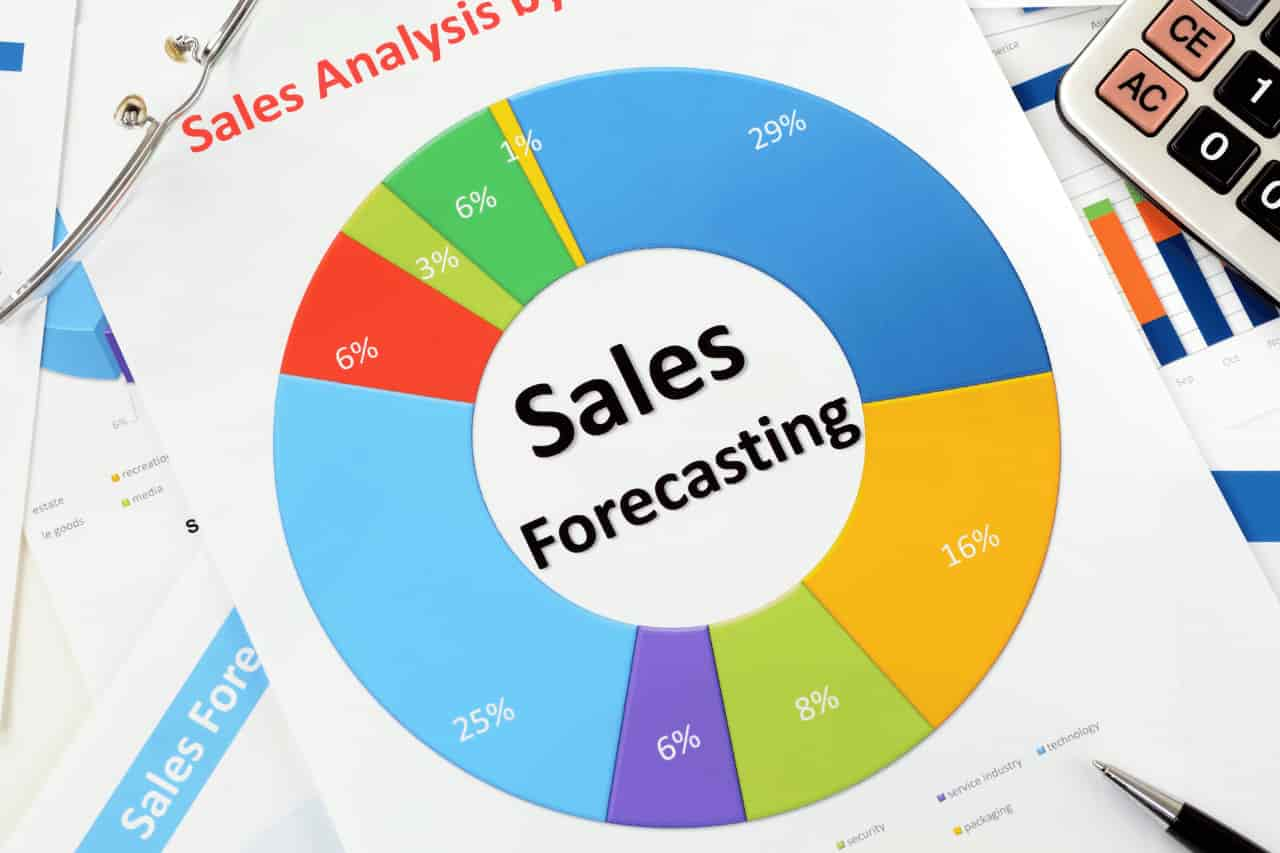

In the realm of business analysis, the dataset under consideration holds a wealth of information encompassing both financial and operational aspects. This dataset harbors the potential for various analytical endeavors tailored to achieve specific business objectives and extract pertinent insights. The choice of analyses to undertake will invariably hinge upon the desired outcomes and insights sought.

Time series analysis stands out as a promising avenue for forecasting and prediction, but the overall success of these endeavors is amplified by the incorporation of context and domain-specific wisdom, ultimately culminating in a comprehensive understanding of the intricate relationships between variables and business performance.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [130]:
df=pd.read_csv('/content/Month_Value_1 - Sheet1.csv')

In [131]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729,1257.763541,30024676
1,01.02.2015,15807587.45,11636,1358.507000,30024676
2,01.03.2015,22047146.02,15922,1384.697024,30024676
3,01.04.2015,18814583.29,15227,1235.606705,30024676
4,01.05.2015,14021479.61,8620,1626.621765,30024676
...,...,...,...,...,...
59,01.12.2019,58756473.66,38069,1543.420464,29878525
60,01.01.2020,56288300.87,27184,2070.640850,29044998
61,01.02.2020,40225243.26,23509,1711.057181,29044998
62,01.03.2020,50022165.23,32569,1535.882748,29044998


In [132]:
df1=df.rename({'The_average_annual_payroll_of_the_region':'Avg_annual_payroll'},axis=1)
df1

,Period,Revenue,Sales_quantity,Average_cost,Avg_annual_payroll
0,01.01.2015,16010072.12,12729,1257.763541,30024676
1,01.02.2015,15807587.45,11636,1358.507000,30024676
2,01.03.2015,22047146.02,15922,1384.697024,30024676
3,01.04.2015,18814583.29,15227,1235.606705,30024676
4,01.05.2015,14021479.61,8620,1626.621765,30024676
...,...,...,...,...,...
59,01.12.2019,58756473.66,38069,1543.420464,29878525
60,01.01.2020,56288300.87,27184,2070.640850,29044998
61,01.02.2020,40225243.26,23509,1711.057181,29044998
62,01.03.2020,50022165.23,32569,1535.882748,29044998


In [133]:
df1.Period.values

array(['01.01.2015', '01.02.2015', '01.03.2015', '01.04.2015',
       '01.05.2015', '01.06.2015', '01.07.2015', '01.08.2015',
       '01.09.2015', '01.10.2015', '01.11.2015', '01.12.2015',
       '01.01.2016', '01.02.2016', '01.03.2016', '01.04.2016',
       '01.05.2016', '01.06.2016', '01.07.2016', '01.08.2016',
       '01.09.2016', '01.10.2016', '01.11.2016', '01.12.2016',
       '01.01.2017', '01.02.2017', '01.03.2017', '01.04.2017',
       '01.05.2017', '01.06.2017', '01.07.2017', '01.08.2017',
       '01.09.2017', '01.10.2017', '01.11.2017', '01.12.2017',
       '01.01.2018', '01.02.2018', '01.03.2018', '01.04.2018',
       '01.05.2018', '01.06.2018', '01.07.2018', '01.08.2018',
       '01.09.2018', '01.10.2018', '01.11.2018', '01.12.2018',
       '01.01.2019', '01.02.2019', '01.03.2019', '01.04.2019',
       '01.05.2019', '01.06.2019', '01.07.2019', '01.08.2019',
       '01.09.2019', '01.10.2019', '01.11.2019', '01.12.2019',
       '01.01.2020', '01.02.2020', '01.03.2020', '01.04

In [134]:
df1.Revenue.values

array([16010072.12, 15807587.45, 22047146.02, 18814583.29, 14021479.61,
       16783928.52, 19161892.19, 15204984.3 , 20603939.98, 20992874.78,
       14993369.66, 27791807.64, 28601586.5 , 22367074.07, 29738608.57,
       28351007.94, 15264603.73, 24385658.08, 29486517.07, 15270117.26,
       36141027.56, 27915143.66, 21272049.35, 42014159.88, 36007380.67,
       30396775.38, 47678130.73, 27013964.73, 24948844.7 , 31101345.54,
       33848822.23, 16454666.96, 31650092.65, 31572205.62, 22446371.03,
       44966125.77, 44067520.86, 36020287.16, 46995990.41, 35536487.68,
       29699599.18, 33261065.39, 35826534.91, 23268655.21, 35423489.85,
       39831565.7 , 32999145.21, 47221828.2 , 36459960.09, 36546498.66,
       54198706.72, 32743989.61, 32531657.54, 47709701.63, 45992141.57,
       36933665.02, 48526260.13, 44160416.18, 36374956.49, 58756473.66,
       56288300.87, 40225243.26, 50022165.23, 52320692.94])

In [135]:
df1.Average_cost.values

array([1257.763541, 1358.507   , 1384.697024, 1235.606705, 1626.621765,
       1275.374508, 1110.576805, 1759.42887 , 1276.259909, 1157.588904,
       1383.024597, 1256.808558, 1861.476505, 1700.530226, 1621.604699,
       2038.321083, 1784.707557, 1614.837301, 1878.720425, 1836.675157,
       2034.509545, 1471.61915 , 1583.566541, 1554.410444, 2132.001934,
       1916.085185, 2092.43091 , 1508.317405, 2315.008323, 1654.414891,
       1891.101303, 1705.323552, 1570.02295 , 1617.511431, 1461.35228 ,
       1458.376602, 2224.284315, 1955.074205, 1620.3279  , 1612.875581,
       1985.400039, 1441.932865, 1947.411801, 1931.810312, 1516.546359,
       1759.033991, 1669.574764, 1422.044394, 1513.112554, 1690.089653,
       1623.736682, 1470.648534, 1917.348827, 1911.599553, 2098.46884 ,
       2559.328184, 2086.881698, 1659.978806, 1654.384704, 1543.420464,
       2070.64085 , 1711.057181, 1535.882748, 1965.83479 ])

In [136]:
df1.Sales_quantity.values

array([12729, 11636, 15922, 15227,  8620, 13160, 17254,  8642, 16144,
       18135, 10841, 22113, 15365, 13153, 18339, 13909,  8553, 15101,
       15695,  8314, 17764, 18969, 13433, 27029, 16889, 15864, 22786,
       17910, 10777, 18799, 17899,  9649, 20159, 19519, 15360, 30833,
       19812, 18424, 29004, 22033, 14959, 23067, 18397, 12045, 23358,
       22644, 19765, 33207, 24096, 21624, 33379, 22265, 16967, 24958,
       21917, 14431, 23253, 26603, 21987, 38069, 27184, 23509, 32569,
       26615])

In [137]:
df1.Avg_annual_payroll.values

array([30024676, 30024676, 30024676, 30024676, 30024676, 30024676,
       30024676, 30024676, 30024676, 30024676, 30024676, 30024676,
       27828571, 27828571, 27828571, 27828571, 27828571, 27828571,
       27828571, 27828571, 27828571, 27828571, 27828571, 27828571,
       27406473, 27406473, 27406473, 27406473, 27406473, 27406473,
       27406473, 27406473, 27406473, 27406473, 27406473, 27406473,
       28197847, 28197847, 28197847, 28197847, 28197847, 28197847,
       28197847, 28197847, 28197847, 28197847, 28197847, 28197847,
       29878525, 29878525, 29878525, 29878525, 29878525, 29878525,
       29878525, 29878525, 29878525, 29878525, 29878525, 29878525,
       29044998, 29044998, 29044998, 29044998])

In [138]:
df1.shape

(64, 5)

In [139]:
df1.isnull().sum()

Period                0
Revenue               0
Sales_quantity        0
Average_cost          0
Avg_annual_payroll    0
dtype: int64

Since the given dataset contains no Null values,the dataset is perfectly fit for the analysis.

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              64 non-null     object 
 1   Revenue             64 non-null     float64
 2   Sales_quantity      64 non-null     int64  
 3   Average_cost        64 non-null     float64
 4   Avg_annual_payroll  64 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ KB


In [141]:
df1.describe()

,Revenue,Sales_quantity,Average_cost,Avg_annual_payroll
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399797,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401095,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [142]:
df1.columns

Index(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'Avg_annual_payroll'],
      dtype='object')

## Task 1: Financial Analysis - Analyzing Revenue and Cost Trends

In [143]:
# Converting 'Period' column to datetime
df1['Period'] = pd.to_datetime(df1['Period'], format='%d.%m.%Y')

# Setting 'Period' as the index for time series analysis
df1.set_index('Period', inplace=True)


The given code converts the values in the 'Period' column to datetime format.The format='%d.%m.%Y' argument specifies the expected date format in the 'Period' column as day.month.year . Once the 'Period' column has been converted to DateTime format, the code sets the 'Period' column as the index of the DataFrame(df1) for time series analysis.

In [144]:
df1.columns

Index(['Revenue', 'Sales_quantity', 'Average_cost', 'Avg_annual_payroll'], dtype='object')

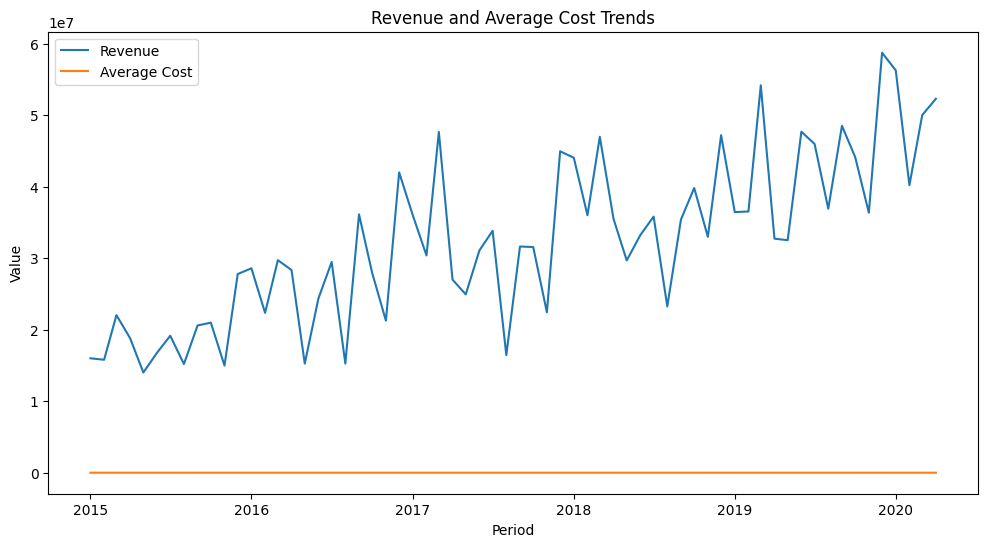

In [145]:
# Visualizing the Revenue and Cost trends over time

plt.figure(figsize=(12, 6))
plt.plot(df1['Revenue'], label='Revenue')
plt.plot(df1['Average_cost'], label='Average Cost')
plt.title('Revenue and Average Cost Trends')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

The above plot shows us the increasing Trend between Revenue and Average Cost. Trend is the long-term movement or direction of the data. Trends can be upward (increasing), downward (decreasing), or horizontal (constant). Identifying the trend component helps in understanding the overall trajectory of the data over time.

## Task 2: Sales Quantity Analysis - Exploring Relationship Between Sales Quantity and Revenue

In [146]:
# Visualizing the  Sales Quantity and Revenue trends over time

import plotly.express as px

fig = px.line(df1, x=df1.index, y=['Sales_quantity', 'Revenue'],
              labels={'x': 'Period', 'y': 'Value'},
              title='Sales Quantity and Revenue Trends')

fig.show()

The above plot shows us the increasing Trend between Revenue and Sales quantity. In this plot, we used the Plotly Express instead of matlplotlib .

"Plotly Express" is a high-level Python data visualization library that simplifies the creation of a wide range of interactive and visually appealing plots. It's built on top of the "Plotly" library, which itself provides a powerful platform for creating interactive visualizations, but can sometimes require more code and configuration. Plotly Express aims to streamline the process of generating common types of plots with a simpler syntax.

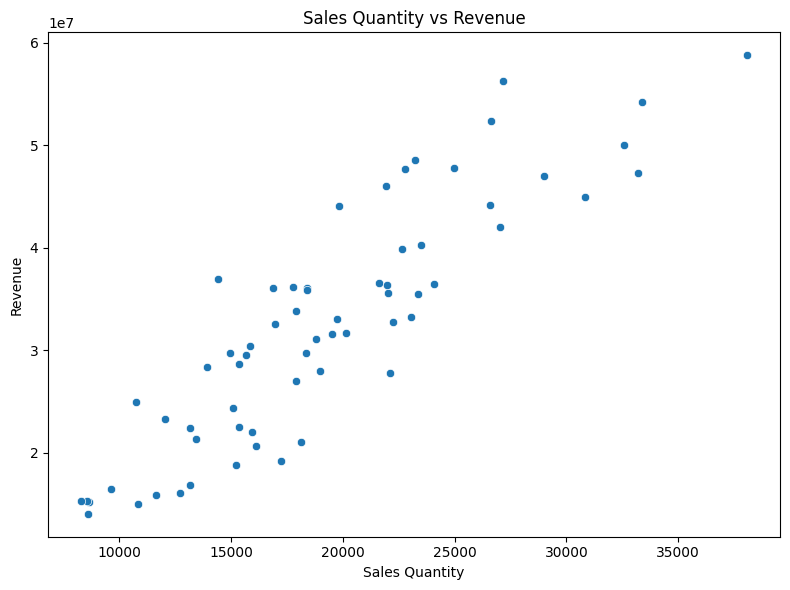

In [147]:
# Sales Quantity Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Sales_quantity', y='Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.title('Sales Quantity vs Revenue')
plt.tight_layout()
plt.show()

## Task 3: Cost Management - Investigating Cost Structure and Opportunities for Optimization


In [148]:
# Calculating cost percentage of revenue

df1['Cost_Percentage'] = (df1['Average_cost'] / df1['Revenue']) * 100

fig = px.line(df1, x=df1.index, y='Cost_Percentage',
              labels={'x': 'Period', 'y': 'Percentage'},
              title='Cost Percentage of Revenue')

fig.show()


Here in this plot, we can clearly see the Decreasing Trend of the monthly wise Cost percentage of Revenue.

In [149]:
# BAR PLOT showcasing the Cost Percentage of Revenue

fig = px.bar(df1, x=df1.index, y='Cost_Percentage',
             labels={'x': 'Period', 'y': 'Percentage'},
             title='Cost Percentage of Revenue')

fig.update_xaxes(tickangle=45)

fig.show()

The provided code creates an interactive bar chart using Plotly Express. The chart visualizes the cost percentage relative to revenue for different periods. The x-axis displays the periods (likely as timestamps), the y-axis represents the cost percentages, and the chart is titled "Cost Percentage of Revenue". The x-axis tick labels are tilted by 45 degrees for enhanced clarity.

## Task 4: Payroll Analysis - Studying Impact of Average Annual Payroll

In [150]:
# Visualizing the Average Annual Payroll and Revenue trends over time

fig = px.line(df1, x=df1.index, y=['Avg_annual_payroll', 'Revenue'],
              labels={'x': 'Period', 'y': 'Value'},
              title='Avg Annual Payroll and Revenue Trends')

fig.show()

The provided code utilizes Plotly Express to create and display a line chart comparing the trends of average annual payroll and revenue over different periods. The chart is titled "Avg Annual Payroll and Revenue Trends" and showcases how these two variables change over time.

From the plot, we can see that there is a increasing Trend of the Revenue and there not much change in the Avg Annual Payroll trend ,mostly we can say it is constant trend.

## Task 5: Periodic Performance Analysis - Variations Across Different Periods

In [151]:
# Visualizing monthly revenue and average cost
data = {
    'Date': df1.index,
    'Revenue': df1['Revenue'],
    'Average_cost': df1['Average_cost']
}

monthly_data = pd.DataFrame(data)

# Converting the 'Date' column to datetime type

monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Setting the 'Date' column as the index

monthly_data.set_index('Date', inplace=True)

print(monthly_data)

monthly_data_reset = monthly_data.reset_index()

fig = px.line(monthly_data_reset, x=monthly_data_reset.index, y=['Revenue', 'Average_cost'],
              labels={'x': 'Year-Month', 'y': 'Value'},
              title='Monthly Revenue and Average Cost')

fig.update_xaxes(tickangle=-45)

fig.show()

                Revenue  Average_cost
Date                                 
2015-01-01  16010072.12   1257.763541
2015-02-01  15807587.45   1358.507000
2015-03-01  22047146.02   1384.697024
2015-04-01  18814583.29   1235.606705
2015-05-01  14021479.61   1626.621765
...                 ...           ...
2019-12-01  58756473.66   1543.420464
2020-01-01  56288300.87   2070.640850
2020-02-01  40225243.26   1711.057181
2020-03-01  50022165.23   1535.882748
2020-04-01  52320692.94   1965.834790

[64 rows x 2 columns]


 The above code extracts monthly revenue and average cost data, creates a structured DataFrame, converts and assigns date-based indices, generates a line chart using Plotly Express, and showcases the trends of monthly revenue and average cost over time, facilitating easy visualization and interpretation.

 We can see the increasing Trend of the Monthly Revenue and Constant trend of the Average cost.

## Task 6: Profit Margin Analysis - Calculating and Visualizing Profit Margins

In [152]:
# Calculating the profit margins

df1['Profit_Margin'] = ((df1['Revenue'] - df1['Average_cost']) / df1['Revenue']) * 100

# Visualizing Profit Margins over time

fig = px.line(df1, x=df1.index, y='Profit_Margin',
              labels={'x': 'Period', 'y': 'Margin (%)'},
              title='Profit Margin Over Time')

fig.show()

The code computes profit margins using revenue and average cost for each period in the df1 DataFrame using the formula mentioned in the code. And it also visualizes these profit margins over time in a line chart, and provides insights into how the profit margins fluctuate across different periods. This visualization allows for an intuitive understanding of the profitability trends over the specified time range.


## Task 7: Operational Efficiency Analysis - Relationship Between Costs, Payroll, and Business Efficiency

In [153]:
# Visualizing the Average Annual Payroll, Average Cost, and Revenue trends over time

fig = px.line(df1, x=df1.index, y=['Avg_annual_payroll', 'Average_cost', 'Revenue'],
              labels={'x': 'Period', 'y': 'Value'},
              title='Operational Efficiency Analysis')

fig.show()

The provided code utilizes Plotly Express to create a line chart visualizing the trends of Average annual payroll, Average cost, and Revenue over time.

The chart is titled "Operational Efficiency Analysis" and offers insights into how these three metrics change over different periods. By displaying these metrics together, the chart provides a comprehensive overview of the operational efficiency and financial performance of the analyzed entity across the specified time range.

## Task 8: Time Series Analysis - Seasonality and Trends

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [155]:
# Generating a hypothetical data
np.random.seed(42)
date_range = pd.date_range(start='2015-01-01', periods=100, freq='M')
revenue = np.random.randint(50000, 80000, size=len(date_range))
sales = np.random.randint(100, 300, size=len(date_range))
costs = revenue * 0.6 + np.random.normal(scale=1000, size=len(date_range))

* The random number generator is seeded with 42 (np.random.seed(42)), ensuring reproducibility.
* A date range is generated using pd.date_range() starting from '2015-01-01', spanning 100 periods (months), and with a monthly frequency (freq='M').
* The revenue column is generated with random integer values ranging from 50,000 to 80,000. This likely simulates the revenue generated by the entity.
* The sales column is generated with random integer values ranging from 100 to 300. This likely represents the number of sales made.
The costs column is generated by calculating costs as 60% of revenue plus random normal noise with a mean of 0 and a standard deviation of 1000. This simulates costs associated with the revenue.

In [156]:
import plotly.graph_objects as go
fig = go.Figure()

# Adding traces for Revenue and Sales Quantity
fig.add_trace(go.Scatter(x=df1.index, y=df1['Revenue'], mode='lines', name='Revenue', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df1.index, y=df1['Sales_quantity'], mode='lines', name='Sales Quantity', line=dict(color='orange')))

# Creating a secondary y-axis for Average Cost
fig.update_layout(yaxis2=dict(anchor='x', overlaying='y', side='right', title='Average Cost'))

# Adding a trace for Average Cost on the secondary y-axis
fig.add_trace(go.Scatter(x=df1.index, y=df1['Average_cost'], mode='lines', name='Average Cost', line=dict(color='red'), yaxis='y2'))

# Setting titles and labels

fig.update_layout(title='Revenue, Sales Quantity, and Average Cost Trends',
                  xaxis_title='Period',
                  yaxis_title='Revenue / Sales Quantity')
fig.show()

The code creates an interactive line chart that displays revenue and Sales quantity on the primary y-axis and Average cost on the secondary y-axis.

This allows for easy comparison of these metrics over time. The chart's title is "Revenue, Sales Quantity, and Average Cost Trends", and labels are applied to the x-axis and primary y-axis.

The secondary y-axis is overlaid on the primary y-axis, aiding in understanding the relationships between the different variables.

In [157]:
# Performing decomposition to examine trends and seasonality

decomposition = seasonal_decompose(df1['Revenue'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Decomposing the time series into trend, seasonality, and residual components to better understand the patterns.

In [158]:
# Visualizing decomposition components

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    vertical_spacing=0.08, subplot_titles=['Original', 'Trend', 'Seasonal', 'Residual'])

# Adding traces for Original, Trend, Seasonal, and Residual

fig.add_trace(go.Scatter(x=df1.index, y=df1['Revenue'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=df1.index, y=trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df1.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df1.index, y=residual, mode='lines', name='Residual'), row=4, col=1)

# Setting the layout
fig.update_layout(title='Decomposition of Time Series',
                  xaxis_title='Period',
                  showlegend=True)
fig.show()


The provided code uses the Plotly library to create a single figure with multiple subplots, each illustrating a different aspect of time series decomposition.Each subplot offers insights into different components of the decomposition: the original data, the trend component, the seasonal component, and the residual component. This comprehensive visualization aids in understanding the underlying patterns and variations within the time series data. Some inputs are:

* Subplots Initialization: The code employs make_subplots() from the plotly.subplots module to create a 4-row by 1-column grid of subplots. Each subplot is designed to share the same x-axis for consistent time representation. The subplot titles are set as 'Original', 'Trend', 'Seasonal', and 'Residual', signifying the purpose of each subplot.

* Traces for Original, Trend, Seasonal, and Residual: Within each subplot, traces are added using go.Scatter() to depict different components of the time series decomposition. The 'Original' subplot showcases the actual revenue data, the 'Trend' subplot presents the trend component, the 'Seasonal' subplot depicts the seasonal component, and the 'Residual' subplot illustrates the residual component.

* Layout Configuration: The layout of the entire figure is updated using update_layout(). The title of the figure is set to 'Decomposition of Time Series', the x-axis is labeled as 'Period', and the legend is displayed for clarity.

## SARIMA MODEL

In [159]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [160]:
# Resampling to monthly frequency
df_monthly = df1.resample('M').sum()

In [161]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df_monthly['Revenue'], model='additive')


### Choosing Differencing Orders:

We need to determine the appropriate orders for differencing (d) and seasonal differencing (D) by analyzing the decomposed components and possibly using the ACF(Auto-Correlation Function ) and PACF(Partial Auto-Correlation Function) plots.

Fitting SARIMA Model:

In [162]:
# Replacing the orders with the appropriate values based on the analysis
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# Fitting SARIMA model with specified starting parameters
sarima_model = sm.tsa.SARIMAX(df_monthly['Revenue'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



The provided code snippet involves fitting a Seasonal Autoregressive Integrated Moving Average (SARIMA) model to the time series data. The model is constructed using specific orders and seasonal orders, and then its goodness of fit is assessed through diagnostic plots and statistics. Here's a summary of the code's purpose:

* Model Specification: The SARIMA model is characterized by its parameters:
p, d, q represent the order of autoregressive (AR), differencing (I), and moving average (MA) terms for the non-seasonal component.
P, D, Q, s correspond to the order of seasonal AR, seasonal differencing, seasonal MA terms, and the seasonal period, respectively.

* SARIMA Model Creation: Using the SARIMAX class from the statsmodels.tsa module, a SARIMA model is constructed. It's designed to forecast the 'Revenue' values based on the specified orders.

* Diagnostic Plots: The plot_diagnostics() method is utilized to generate a set of diagnostic plots that assess the goodness of fit of the SARIMA model. These plots include:

    *Histogram of standardized residuals

    *Kernel density estimation of standardized residuals

    *Normal Q-Q plot of standardized residuals
    
    *Correlogram (ACF) of standardized residuals

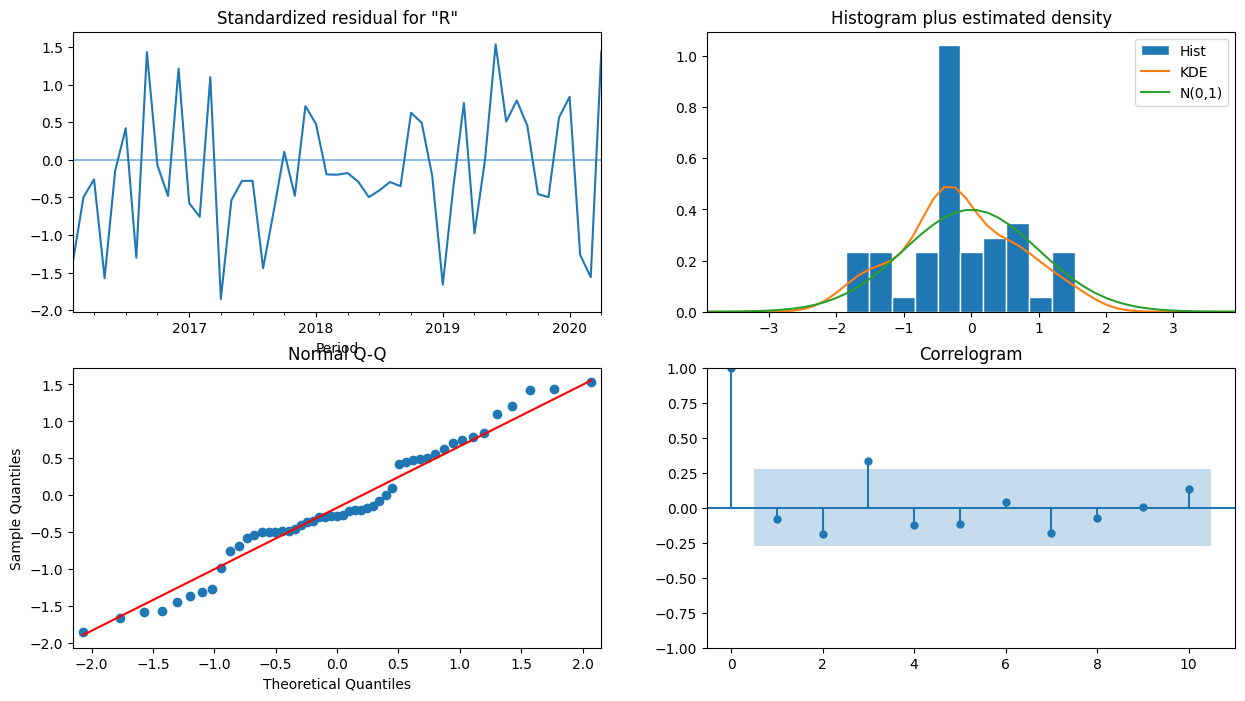

In [163]:
# Checking the diagnostic plots and statistics to assess the model's goodness of fit.

sarima_result.plot_diagnostics(figsize=(15, 8))
plt.show()

By analyzing these diagnostic plots, you can gain insights into the appropriateness of the SARIMA model for the given time series data. Here's what to look for in each plot:

* Histogram and Kernel Density Plot: These plots should resemble a standard normal distribution. Departures from this pattern might indicate issues with the residuals' normality assumption.

* Normal Q-Q Plot: The points on this plot should lie relatively close to the diagonal line. Deviations from the line could indicate non-normality of residuals.

* Correlogram (ACF) of Residuals: The autocorrelation function of residuals should be close to zero for most lags. Significant autocorrelation at certain lags may indicate unaccounted time dependencies in the data.

### Forecasting:

In [164]:
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Getting forecasted values, confidence intervals, and index
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='M')[1:]


The provided code generates forecasts for a specified number of steps using a fitted SARIMA model. Here's a summary of the code's actions:

* Forecast Steps : The variable forecast_steps is set to 12, indicating that you want to forecast the next 12 periods.

* Forecast Generation: The get_forecast() method is applied to the sarima_result (previously fitted SARIMA model) to generate forecasts. The steps parameter is set to forecast_steps, indicating the number of periods to forecast.

* Extracting Forecast Values and Confidence Intervals: From the forecast object, the predicted mean values of the forecast are extracted using the predicted_mean attribute. The confidence intervals for the forecasted values are obtained using the conf_int() method.

* Creating Forecast Index: The forecast_index is generated using the pd.date_range() function. It starts from the last index of the original data (df_monthly.index[-1]), spans the forecast period of forecast_steps + 1 periods, and uses a monthly frequency (freq='M'). The [1:] indexing is used to exclude the starting date that's already in the original data.

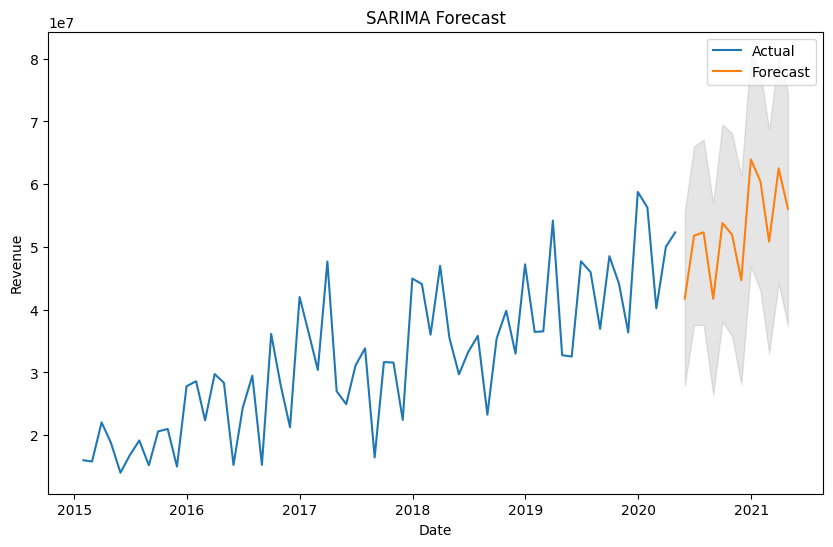

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Revenue'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMA Forecast')
plt.show()

The code generates a visualization that displays the AActual revenue data along with the Forecasted Revenue values and their associated confidence intervals. This visualization aids in assessing the quality of the forecast by comparing it with the actual data and understanding the uncertainty introduced by the confidence intervals.

We can see the forecasted Revenue graph is also a increasing Trend same as the Original Trend

### Evaluating the accuracy of  SARIMA model and performing descriptive analysis:

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating the forecasted values and confidence intervals

forecast_values = forecast.predicted_mean
actual_values = df_monthly['Revenue'][-forecast_steps:]

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast_values)

# Accuracy metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 54185833563457.21
Root Mean Squared Error (RMSE): 7361102.740993174
Mean Absolute Error (MAE): 6838530.891286793


The provided code calculates and evaluates the accuracy of the SARIMA forecast using different error metrics. These error metrics provide quantitative insights into the accuracy of the SARIMA forecast. Lower values of MSE, RMSE, and MAE indicate better forecast accuracy. These metrics help assess how well the forecasted values align with the actual observed values. By considering these accuracy metrics, you can better understand the performance of the SARIMA model in predicting revenue for the specified forecast period.

### ARIMA MODEL

In [167]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [168]:
# Pre-differencing the data
df_monthly['Differenced_Revenue'] = df_monthly['Revenue'].diff(1)

# Fitting the ARIMA model
arima_model = sm.tsa.ARIMA(df_monthly['Differenced_Revenue'].dropna(), order=(1, 1, 1))
arima_result = arima_model.fit()

* Pre-differencing the Data: The code creates a new column named 'Differenced_Revenue' in the df_monthly DataFrame. This column contains the first-order differences of the 'Revenue' column, calculated using the diff(1) function. The differencing operation transforms the time series data by subtracting each value from its preceding value, helping to stabilize and make the data more stationary.

* Fitting the ARIMA Model: An ARIMA model is fitted to the differenced data using the ARIMA class from the statsmodels.tsa module. The order of the ARIMA model is specified as (1, 1, 1), which represents the autoregressive (AR) order, differencing (I) order, and moving average (MA) order, respectively

In [169]:
# Forecasting the future values using ARIMA
forecast_steps = 12
forecast_arima = arima_result.get_forecast(steps=forecast_steps)

# Getting forecasted values, confidence intervals, and index

forecast_values_arima = forecast_arima.predicted_mean
conf_int_arima = forecast_arima.conf_int()
forecast_index_arima = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='M')[1:]

####ARIMA Forecast Generation:
The get_forecast() method is applied to the arima_result (fitted ARIMA model) to generate forecasts. The steps parameter is set to forecast_steps, indicating the number of periods to forecast.

#### Extracting Forecast Values and Confidence Intervals:
From the ARIMA forecast object, the predicted mean values of the forecast are extracted using the predicted_mean attribute. The confidence intervals for the forecasted values are obtained using the conf_int() method.

#### Creating Forecast Index:
The forecast_index_arima is generated using the pd.date_range() function. It starts from the last index of the original data (df_monthly.index[-1]), spans the forecast period of forecast_steps + 1 periods, and uses a monthly frequency (freq='M'). The [1:] indexing is used to exclude the starting date that's already in the original data.

In [170]:
# Accuracy metrics for ARIMA
mse_arima = mean_squared_error(actual_values, forecast_values_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_values, forecast_values_arima)

#  ARIMA accuracy metrics
print("ARIMA Mean Squared Error (MSE):", mse_arima)
print("ARIMA Root Mean Squared Error (RMSE):", rmse_arima)
print("ARIMA Mean Absolute Error (MAE):", mae_arima)

ARIMA Mean Squared Error (MSE): 2104548308018977.0
ARIMA Root Mean Squared Error (RMSE): 45875356.216807485
ARIMA Mean Absolute Error (MAE): 45228555.732246466


These error metrics offer a quantitative assessment of the accuracy of the ARIMA forecast. Lower values of MSE, RMSE, and MAE indicate better forecast accuracy. These metrics help you assess how well the ARIMA model's predictions align with the actual observed values. By considering these accuracy metrics, you can better understand the performance of the ARIMA model in predicting revenue for the specified forecast period.

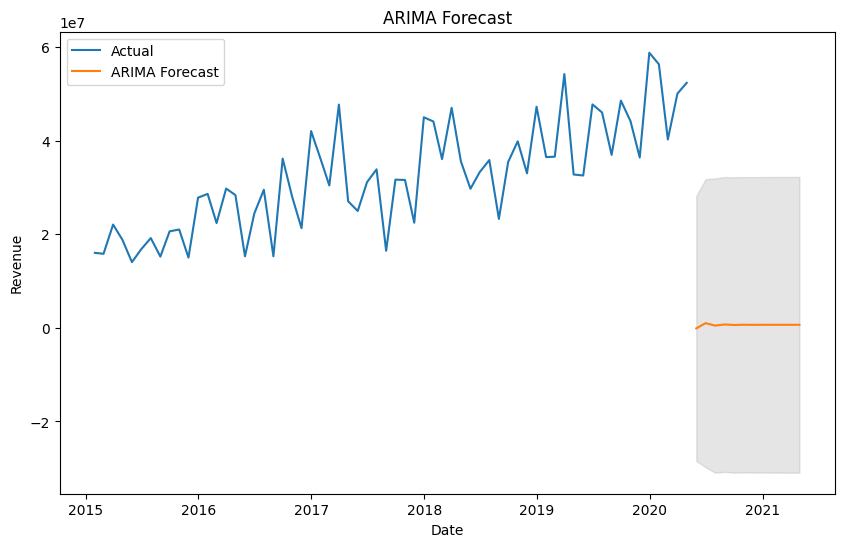

In [171]:
# Plotting the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Revenue'], label='Actual')
plt.plot(forecast_index_arima, forecast_values_arima, label='ARIMA Forecast')
plt.fill_between(conf_int_arima.index, conf_int_arima.iloc[:, 0], conf_int_arima.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('ARIMA Forecast')
plt.show()

The above plot showcases us the actual revenue data, the ARIMA forecasted revenue values, and their associated uncertainty through confidence intervals. This visualization aids in assessing the accuracy of the ARIMA model's predictions and understanding the range of possible values within the forecast period.

Task 9: Payroll Management Analysis - Assessing Payroll's Effect on Profit

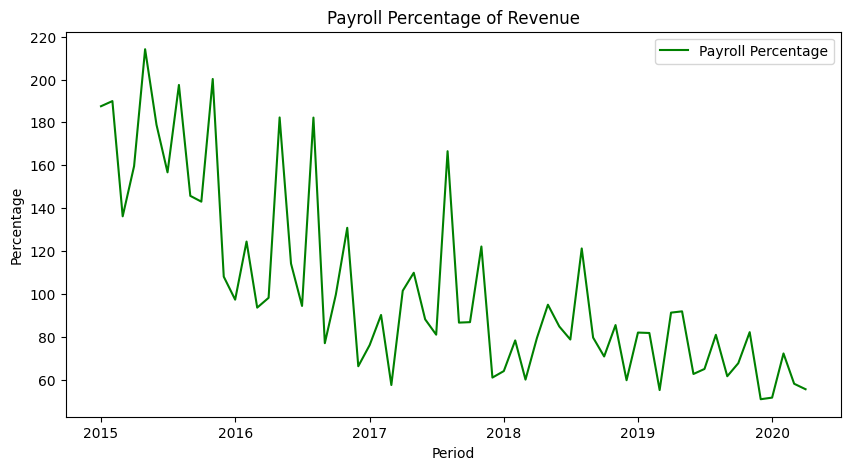

In [172]:
# Payroll percentage of revenue

df1['Payroll_Percentage'] = (df1['Avg_annual_payroll'] / df1['Revenue']) * 100

plt.figure(figsize=(10, 5))
plt.plot(df1['Payroll_Percentage'], label='Payroll Percentage', color='green')
plt.title('Payroll Percentage of Revenue')
plt.xlabel('Period')
plt.ylabel('Percentage')
plt.legend()
plt.show()

## Task 10: Data Visualization - Creating Various Types of Charts

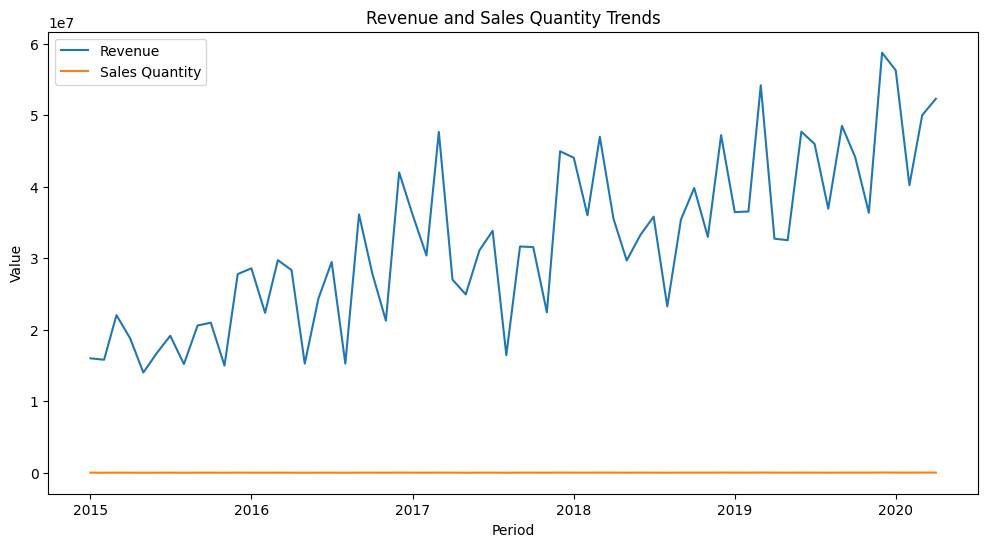

In [173]:
# Revenue and Sales Quantity Trends

plt.figure(figsize=(12, 6))
plt.plot(df1['Revenue'], label='Revenue')
plt.plot(df1['Sales_quantity'], label='Sales Quantity')
plt.title('Revenue and Sales Quantity Trends')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

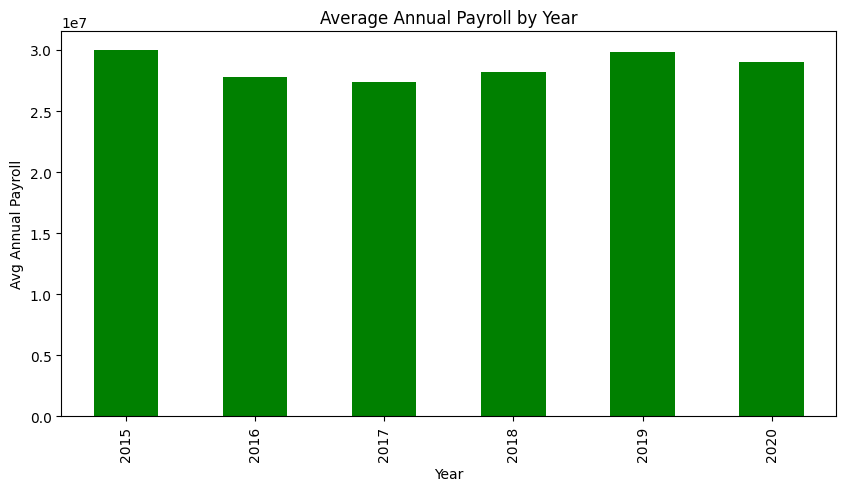

In [174]:
# Plotting Bar Plot for Average Annual Payroll by Year

avg_payroll_by_year = df1.groupby(df1.index.year)['Avg_annual_payroll'].mean()
plt.figure(figsize=(10, 5))
avg_payroll_by_year.plot(kind='bar', color='green')
plt.title('Average Annual Payroll by Year')
plt.xlabel('Year')
plt.ylabel('Avg Annual Payroll')
plt.show()

The above Bar plot visually conveys the Average Annual Payroll for each year. This visualization provides insights into how the average payroll has changed over different years, allowing for easy comparison and analysis of the annual payroll trends.

From the barplot we see that there is not much difference in the Average Annual Payroll from  2015 to 2020 .

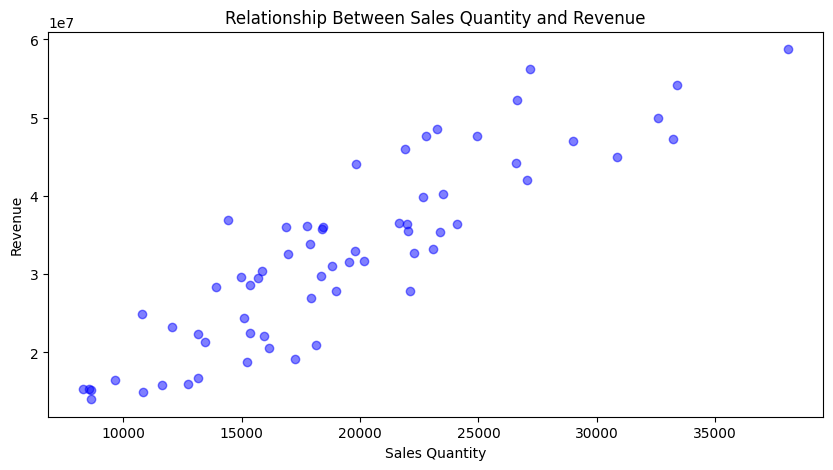

In [175]:
# Drawing a Scatter Plot showcasing theRe lationship between Sales Quantity and Revenue

plt.figure(figsize=(10, 5))
plt.scatter(df1['Sales_quantity'], df1['Revenue'], color='blue', alpha=0.5)
plt.title('Relationship Between Sales Quantity and Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.show()

The above is a scatter plot that visually depicts the relationship between sales quantity and revenue. Each point on the plot represents a specific observation, allowing you to discern patterns and tendencies in how changes in sales quantity correspond to changes in revenue. The scatter plot helps provide insights into potential correlations or trends between these two variables.

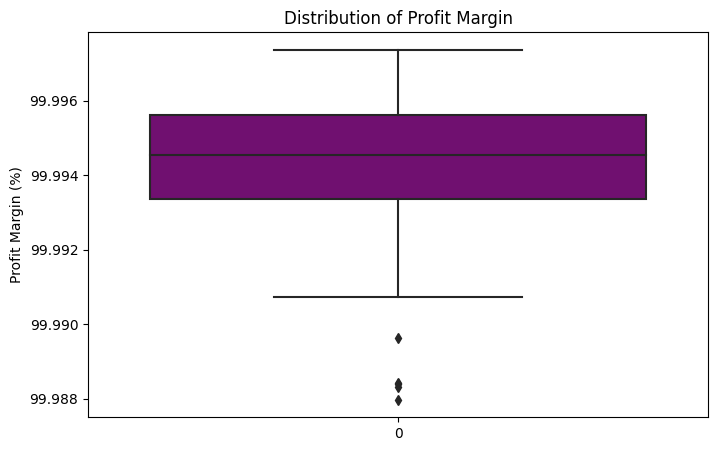

In [176]:
#  Distribution of Profit Margin using Box Plot

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1['Profit_Margin'], color='purple')
plt.title('Distribution of Profit Margin')
plt.ylabel('Profit Margin (%)')
plt.show()

The above box plot provides insights into the distribution of profit margins. The box represents the interquartile range (IQR), while the whiskers extend to show the range of data within a specified distance from the quartiles. The plot helps to identify potential outliers and understand the spread and variability of profit margins within the dataset. There are some Outliers in the BOXPLOT which shows the values are odd ones from the other values.

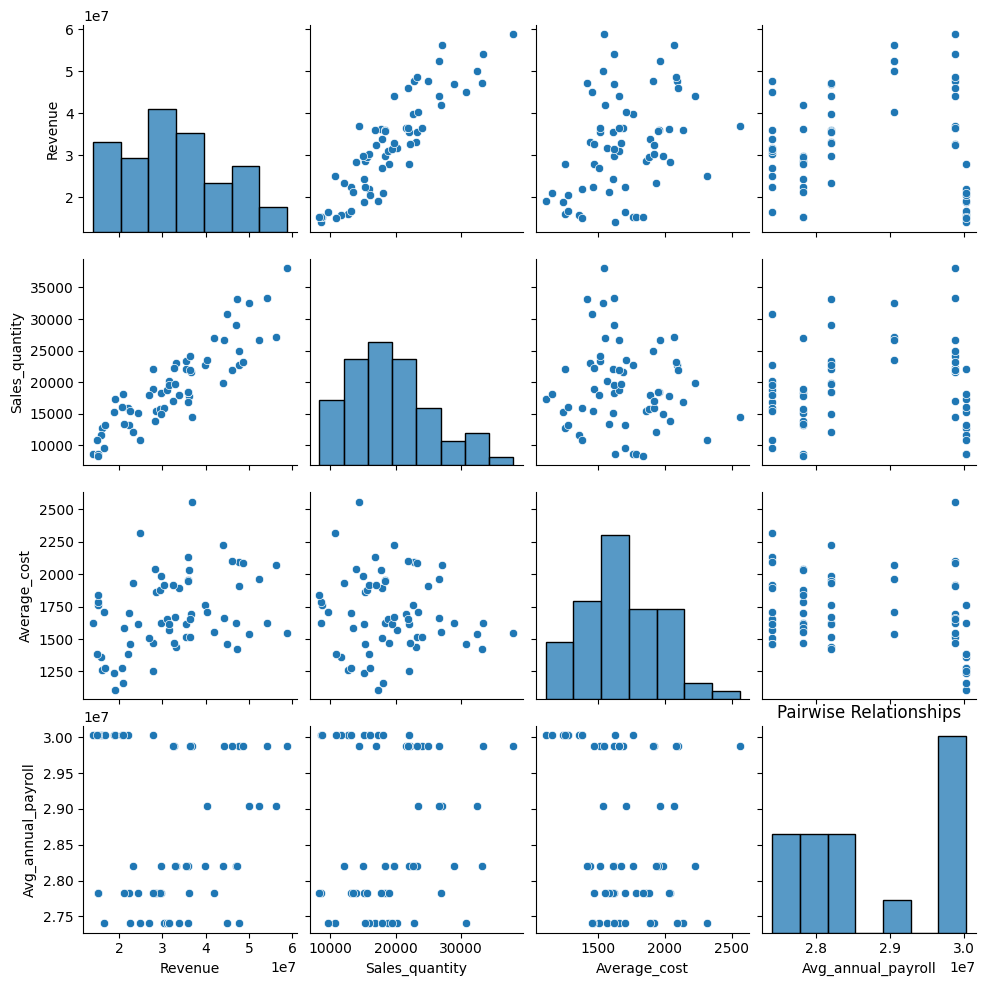

In [177]:
# Pairwise Relationships Across Numeric Variables

sns.pairplot(df1[['Revenue', 'Sales_quantity', 'Average_cost', 'Avg_annual_payroll']])
plt.title('Pairwise Relationships')
plt.show()

The above plot shows a matrix of scatter plots that visually represent the pairwise relationships between the selected variables: 'Revenue', 'Sales_quantity', 'Average_cost', and 'Avg_annual_payroll'. Each plot in the matrix shows the correlation between two variables, making it easy to identify patterns, trends, and potential correlations between different aspects of the dataset. This visualization helps to gain insights into how these variables interact with each other and their potential impacts on business performance.

## CONCLUSION

The dataset comprises financial and operational data of a business, with the aim of extracting insights for informed decisions. Analyses encompass data preprocessing, visualization, statistical assessment, and predictive modeling.

Time series analysis highlights trends, seasonality, and patterns. ARIMA and SARIMA models predict future values, aided by accuracy metrics such as MSE, RMSE, and MAE to gauge forecast reliability.

Visualizations, like scatter and pair plots, unravel relationships among variables. For instance, sales quantity and revenue connections are elucidated.

These efforts yield significant insights: spotting trends, predicting future performance, recognizing relationships, and assessing forecast accuracy. These insights empower data-driven decisions, optimizing operations, and steering financial growth.





